In [27]:
# Logistic regression
import torch
import matplotlib.pyplot as plt

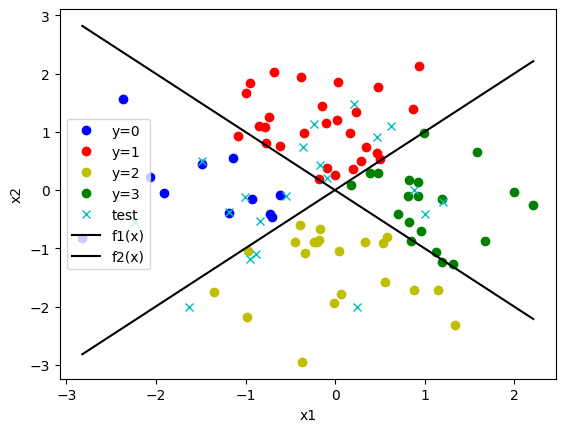

In [28]:
# Create a simple dataset
n_data = 100
n_train = 80
X = torch.randn(n_data,2)
def f1(input):
    return (input[0]- X[:,0].median()) - (input[1] - X[:,1].median())
def f2(input):
    return (input[0]- X[:,0].median()) + (input[1] - X[:,1].median())

y = torch.tensor([
    3 if f1(x_row) > 0 and f2(x_row) > 0 
    else (2 if f1(x_row) > 0 and f2(x_row) < 0 
          else (1 if f1(x_row) < 0 and f2(x_row) > 0 
                else 0)) for x_row in X])
                  
# Split data for training and testing
idx = torch.randperm(n_data)
X_train = X[idx[:n_train]]
X_test = X[idx[n_train:]]
y_train = y[idx[:n_train]]
y_test = y[idx[n_train:]]

# plot the data with different marker
x1_plot = torch.linspace(X[:,0].min(), X[:,0].max(), 100)
x2_plot_f1 = x1_plot - (X[:,0].median() - X[:,1].median())
x2_plot_f2 = - x1_plot + (X[:,0].median() - X[:,1].median())

X_train_label0 = X_train[y_train==0]
X_train_label1 = X_train[y_train==1]
X_train_label2 = X_train[y_train==2]
X_train_label3 = X_train[y_train==3]
plt.plot(X_train_label0[:,0], X_train_label0[:,1], c='b', marker='o', linestyle='None', label='y=0')
plt.plot(X_train_label1[:,0], X_train_label1[:,1], c='r', marker='o', linestyle='None', label='y=1')
plt.plot(X_train_label2[:,0], X_train_label2[:,1], c='y', marker='o', linestyle='None', label='y=2')
plt.plot(X_train_label3[:,0], X_train_label3[:,1], c='g', marker='o', linestyle='None', label='y=3')
plt.plot(X_test[:,0], X_test[:,1], c='c', marker='x', linestyle='None', label='test')
plt.plot(x1_plot, x2_plot_f1, c='k', label='f1(x)')
plt.plot(x1_plot, x2_plot_f2, c='k', label='f2(x)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

epoch: 0, loss: -0.2191958874464035
epoch: 10, loss: -0.24419358372688293
epoch: 20, loss: -0.27243250608444214
epoch: 30, loss: -0.30308130383491516
epoch: 40, loss: -0.3347476124763489
epoch: 50, loss: -0.36587122082710266
epoch: 60, loss: -0.39522749185562134
epoch: 70, loss: -0.4221920371055603
epoch: 80, loss: -0.4466753602027893
epoch: 90, loss: -0.46889764070510864
test loss: -0.45512065291404724


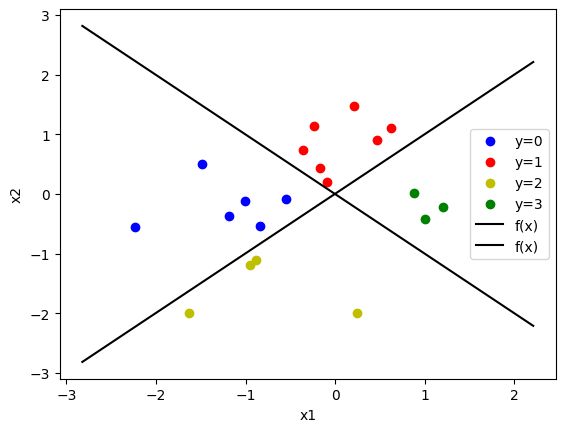

In [29]:
# Define softmax model
class Softmax(torch.nn.Module):
    def __init__(self):
        super(Softmax, self).__init__()
        self.linear = torch.nn.Linear(2, 4)
    
    def forward(self, x):
        return torch.nn.functional.softmax(self.linear(x), dim=1)

# Create a model, loss function and optimizer
model = Softmax()
criterion = torch.nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Train the model
for epoch in range(100):
    y = model(X_train)
    loss = criterion(y, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print('epoch: {}, loss: {}'.format(epoch, loss.item()))

# Test the model
y_test_pred = model(X_test)

# Print the test loss and plot the data
test_loss = criterion(y_test_pred, y_test)
print('test loss: {}'.format(test_loss.item()))
X_test_label0 = X_test[y_test==0]
X_test_label1 = X_test[y_test==1]
X_test_label2 = X_test[y_test==2]
X_test_label3 = X_test[y_test==3]
plt.plot(X_test_label0[:,0], X_test_label0[:,1], c='b', marker='o', linestyle='None', label='y=0')
plt.plot(X_test_label1[:,0], X_test_label1[:,1], c='r', marker='o', linestyle='None', label='y=1')
plt.plot(X_test_label2[:,0], X_test_label2[:,1], c='y', marker='o', linestyle='None', label='y=2')
plt.plot(X_test_label3[:,0], X_test_label3[:,1], c='g', marker='o', linestyle='None', label='y=3')
plt.plot(x1_plot, x2_plot_f1, c='k', label='f(x)')
plt.plot(x1_plot, x2_plot_f2, c='k', label='f(x)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()